In [ ]:
# --- Setup ---
import sys, os
sys.path.append(os.path.abspath("../src"))

import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

from models_deep import build_lstm, build_cnn1d, train_keras

# Paths
PROC_DIR = Path("../data/processed")
MODEL_DIR = Path("../models")
MODEL_DIR.mkdir(exist_ok=True, parents=True)

In [ ]:
# --- Load European dataset ---
df = pd.read_csv(PROC_DIR / "creditcard_processed.csv.gz")

X = df.drop(columns=["Class"]).values
y = df["Class"].values

In [ ]:
# --- Reshape into sequences ---
# European dataset has no user IDs, so we treat each transaction as a sequence of length 1
seq_len = 1
n_features = X.shape[1]
X = X.reshape((-1, seq_len, n_features))

print("Data shape:", X.shape, "Labels:", y.shape)

Data shape: (283726, 1, 34) Labels: (283726,)


In [ ]:
# Train/val split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Class weights for imbalance
cw = compute_class_weight("balanced", classes=np.unique(y), y=y)
class_weight = {i: w for i, w in enumerate(cw)}

In [ ]:
# --- Train LSTM ---
lstm_cfg = {"units": 64, "dropout": 0.3, "epochs": 5, "batch_size": 256, "class_weight": class_weight}
lstm = build_lstm((seq_len, n_features), lstm_cfg)
lstm, hist_lstm = train_keras(lstm, (X_tr, y_tr), (X_val, y_val), lstm_cfg, save_path=MODEL_DIR/"lstm_euro.h5")

Epoch 1/5
884/887 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3668 - pr_auc: 0.6135 - roc_auc: 0.9273

887/887 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.2603 - pr_auc: 0.6711 - roc_auc: 0.9592 - val_loss: 0.1508 - val_pr_auc: 0.7180 - val_roc_auc: 0.9773
Epoch 2/5
879/887 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1615 - pr_auc: 0.7221 - roc_auc: 0.9843

887/887 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1395 - pr_auc: 0.7387 - roc_auc: 0.9862 - val_loss: 0.0906 - val_pr_auc: 0.7351 - val_roc_auc: 0.9793
Epoch 3/5
887/887 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.1213 - pr_auc: 0.7462 - roc_auc: 0.9889 - val_loss: 0.0846 - val_pr_auc: 0.7301 - val_roc_auc: 0.9779
Epoch 4/5
887/887 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1059 - pr_auc: 0.7535 - roc_auc: 0.9915 - val_loss: 0.0790 - val_pr_auc: 0.7324 - val_roc_auc: 0.9787
Epoch 5/5
887/887 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0960 - pr_auc: 0.7402 - roc_auc: 0.9939 - val_loss: 0.0685 - val_pr_auc: 0.7250 - val_roc_auc: 0.9731


In [ ]:
# --- Train CNN1D ---
cnn_cfg = {"filters": 64, "dropout": 0.3, "epochs": 5, "batch_size": 256, "class_weight": class_weight}
cnn = build_cnn1d((seq_len, n_features), cnn_cfg)
cnn, hist_cnn = train_keras(cnn, (X_tr, y_tr), (X_val, y_val), cnn_cfg, save_path=MODEL_DIR/"cnn1d_euro.h5")

Epoch 1/5
878/887 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4466 - pr_auc: 0.5077 - roc_auc: 0.8637

887/887 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2806 - pr_auc: 0.6003 - roc_auc: 0.9378 - val_loss: 0.1307 - val_pr_auc: 0.6887 - val_roc_auc: 0.9482
Epoch 2/5
886/887 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1768 - pr_auc: 0.6491 - roc_auc: 0.9792

887/887 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1620 - pr_auc: 0.6687 - roc_auc: 0.9772 - val_loss: 0.0942 - val_pr_auc: 0.7121 - val_roc_auc: 0.9534
Epoch 3/5
887/887 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1464 - pr_auc: 0.6523 - roc_auc: 0.9831 - val_loss: 0.1023 - val_pr_auc: 0.6659 - val_roc_auc: 0.9640
Epoch 4/5
887/887 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1259 - pr_auc: 0.6236 - roc_auc: 0.9876 - val_loss: 0.0882 - val_pr_auc: 0.6984 - val_roc_auc: 0.9675
Epoch 5/5
887/887 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1100 - pr_auc: 0.6570 - roc_auc: 0.9917 - val_loss: 0.0717 - val_pr_auc: 0.6765 - val_roc_auc: 0.9689


In [8]:
# --- Evaluate ---
from sklearn.metrics import classification_report

y_pred_lstm = (lstm.predict(X_val) >= 0.5).astype(int)
y_pred_cnn  = (cnn.predict(X_val) >= 0.5).astype(int)

print("LSTM Report:")
print(classification_report(y_val, y_pred_lstm, digits=4))

print("CNN Report:")
print(classification_report(y_val, y_pred_cnn, digits=4))

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
LSTM Report:
              precision    recall  f1-score   support

           0     0.9998    0.9861    0.9929     56651
           1     0.0941    0.8632    0.1698        95

    accuracy                         0.9859     56746
   macro avg     0.5470    0.9246    0.5813     56746
weighted avg     0.9983    0.9859    0.9915     56746

CNN Report:
              precision    recall  f1-score   support

           0     0.9997    0.9836    0.9916     56651
           1     0.0800    0.8526    0.1463        95

    accuracy                         0.9833     56746
   macro avg     0.5399    0.9181    0.5690     56746
weighted avg     0.9982    0.9833    0.9902     56746



1774/1774 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

LSTM Metrics:
ROC AUC: 0.980
PR AUC: 0.691


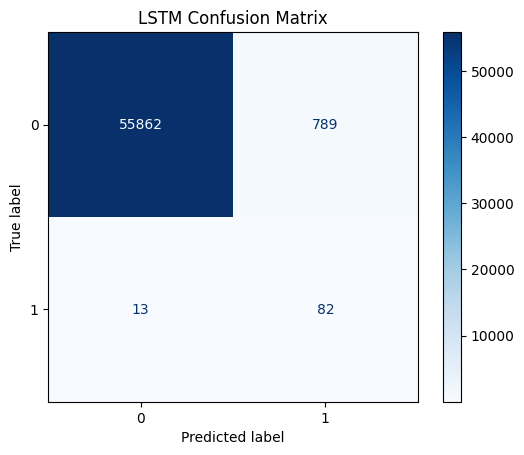

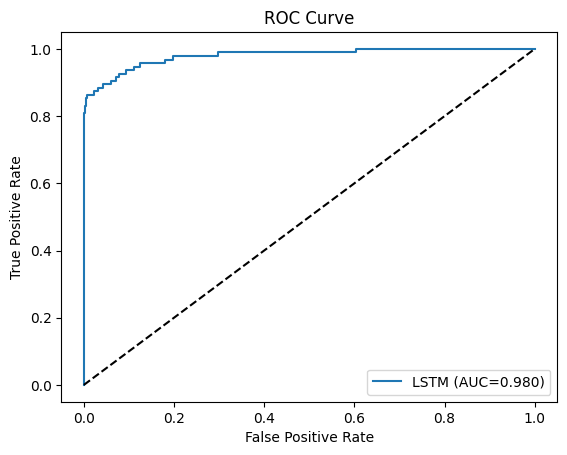

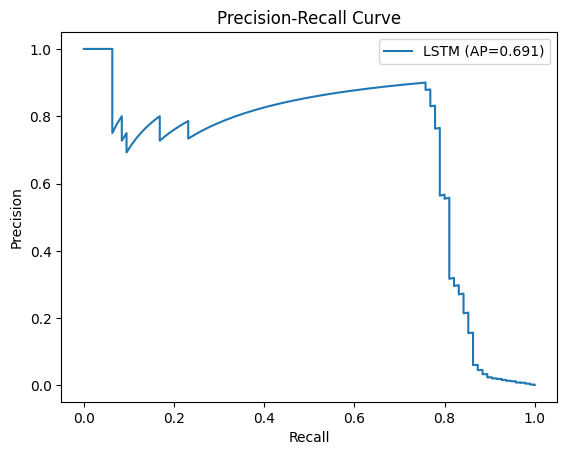

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

CNN1D Metrics:
ROC AUC: 0.953
PR AUC: 0.663


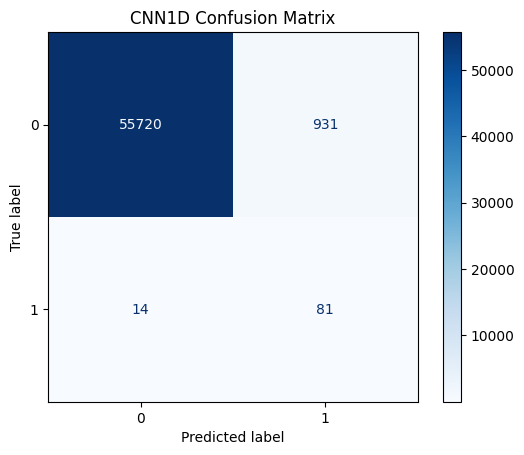

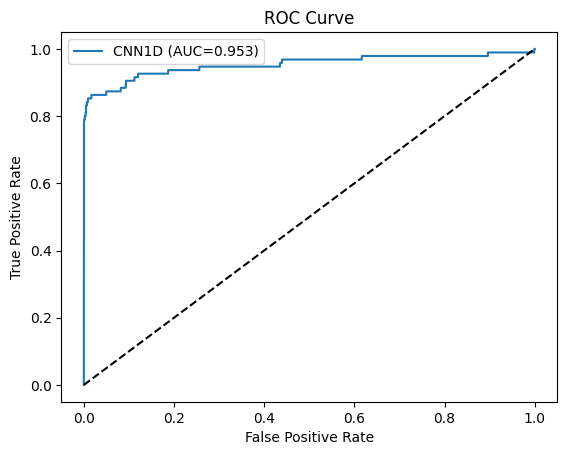

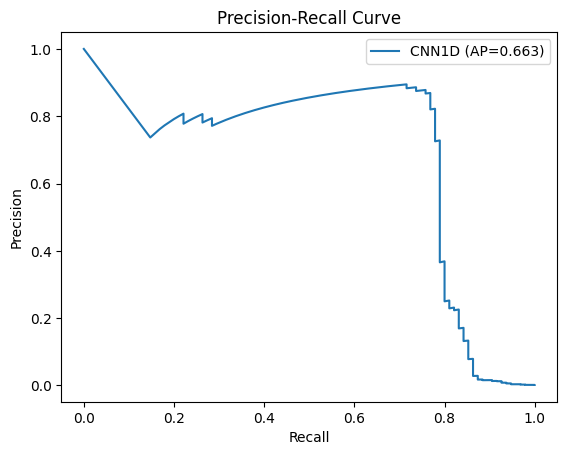

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve,
    ConfusionMatrixDisplay
)

def evaluate_dl(model, X_val, y_val, label):
    # Predict scores
    y_scores = model.predict(X_val).ravel()
    y_pred = (y_scores >= 0.5).astype(int)

    # Metrics
    roc_auc = roc_auc_score(y_val, y_scores)
    pr_auc = average_precision_score(y_val, y_scores)

    print(f"\n{label} Metrics:")
    print(f"ROC AUC: {roc_auc:.3f}")
    print(f"PR AUC: {pr_auc:.3f}")

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap="Blues")
    plt.title(f"{label} Confusion Matrix")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_scores)
    plt.plot(fpr, tpr, label=f"{label} (AUC={roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    # Precision-Recall curve
    prec, rec, _ = precision_recall_curve(y_val, y_scores)
    plt.plot(rec, prec, label=f"{label} (AP={pr_auc:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

# --- Evaluate Deep Models ---
evaluate_dl(lstm, X_val, y_val, "LSTM")
evaluate_dl(cnn, X_val, y_val, "CNN1D")